Regression and Regression Tree Tutorial
Adapted by Matthew Pecsok in June 2021 from Olivia Sheng's R tutorial (October 15, 2016)



# 1 Setup and Import Insurance dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import statsmodels.api as sm
from scipy import stats
#from sklearn.metrics import 
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics


In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load the data

In [ ]:
insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/6482_to_4482/insurance.csv")

show column info

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


show column statistics

In [ ]:
# include all makes sure to include categorical columns and makes it similar to summary in r
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


# 2 Data exploration: some examples

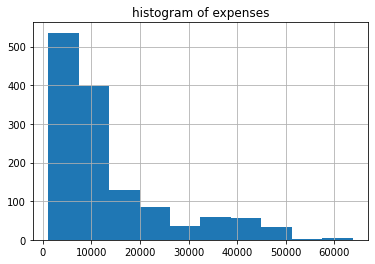

In [ ]:
# histogram of insurance expenses
insurance.expenses.hist()
plt.title("histogram of expenses")
plt.show()

In [ ]:
# correlations
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


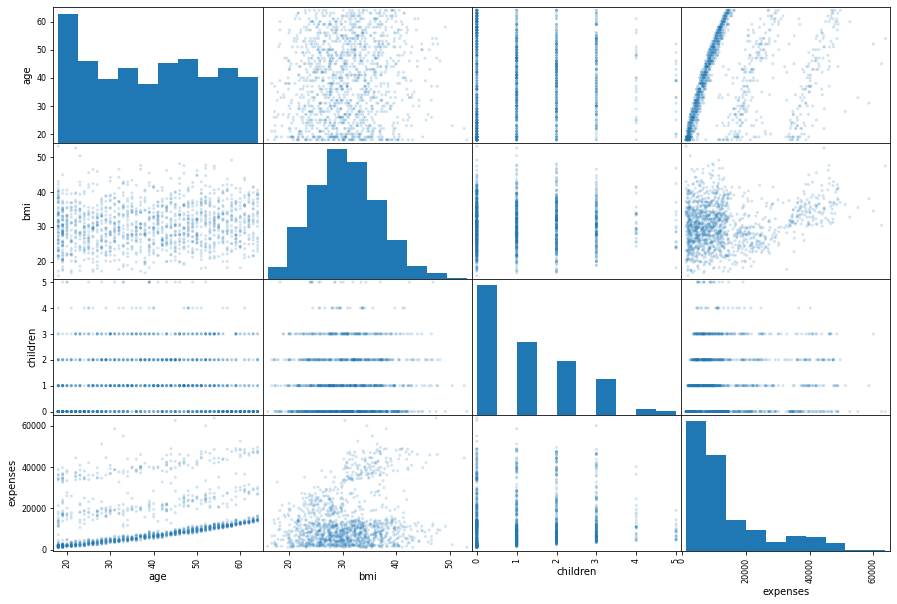

In [ ]:
# visualizing correlations
pd.plotting.scatter_matrix(insurance,figsize=(15, 10),alpha=0.2)
plt.show()

# 3 Building a base explanatory model on the whole data set

In [ ]:
# import the package (generally done above in a libraries section, demonstrated here for informational purposes)
from sklearn.linear_model import LinearRegression

dataset before dummy encoding

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
#dataset after dummy encoding

In [ ]:
# dummy encode the dataframe
X = pd.get_dummies(insurance)
X

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [ ]:
# remove the target variable from our X dataset and put it into a new variable, all in one command
y_true = X.pop('expenses')

In [ ]:
# our target is a pandas series object
type(y_true)

pandas.core.series.Series

In [ ]:
# fit the model 
# no random state as there is no randomness to this classifier
# results are reproducible 

reg = LinearRegression().fit(X,y_true)

In [ ]:
# score gives us R^2
reg.score(X, y_true)

0.7509284662058436

In [ ]:
# coef represents the change in units of the target for every unit in the predictor 
reg.coef_

array([   256.83917062,    339.28986331,    475.68891551,     65.67600705,
          -65.67600705, -11923.73834752,  11923.73834752,    586.92290648,
          234.13281096,   -448.67279452,   -372.38292292])

In [ ]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# make a nice dataframe so we can see the 
# predictors with their coefficients
pd.DataFrame({'column':X.columns,'coef':reg.coef_})

,column,coef
0,age,256.839171
1,bmi,339.289863
2,children,475.688916
3,sex_female,65.676007
4,sex_male,-65.676007
5,smoker_no,-11923.738348
6,smoker_yes,11923.738348
7,region_northeast,586.922906
8,region_northwest,234.132811
9,region_southeast,-448.672795


In [ ]:
# show the intercept 
reg.intercept_

-670.42302686943

In [ ]:
#predict on the X data
y_pred = reg.predict(X)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [ ]:
y_pred

array([25292.73983296,  3458.28119063,  6706.61883724, ...,
        4165.74286548,  1246.43276622, 37093.64856899])

# model metrics

In [ ]:
# MEAN ABSOLUTE ERROR 
sklearn.metrics.mean_absolute_error(y_true, y_pred)

4170.730986790802

In [ ]:
# MEAN SQUARED ERROR
sklearn.metrics.mean_squared_error(y_true, y_pred)

36499631.63514606

In [ ]:
# R SQUARED
sklearn.metrics.r2_score(y_true, y_pred)

0.7509284662058436

# 4 Build a base predictive model and evaluate prediction performance

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_true, 
                                                    test_size=.5, 
                                                    random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train,y_train)

# 5 predict on the test data based on the trained base model

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
import numpy as np

pd.Series(y_test_pred).describe()
# y_test_pred

count      669.000000
mean     13719.351102
std      10547.279061
min      -1175.344183
25%       6340.422626
50%      10323.799132
75%      16094.836225
max      40420.619123
dtype: float64

In [ ]:
type(y_test_pred)

numpy.ndarray

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
pd.Series(y_train)

501      6837.37
1237    12224.35
539     27346.04
177     10436.10
1291    34828.65
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 669, dtype: float64

In [ ]:
comp = pd.DataFrame({'actual':y_test,'predicted':y_test_pred})
comp

,actual,predicted
764,9095.07,9277.997926
887,5272.18,7104.958013
890,29330.98,36253.834160
1293,9301.89,9578.588756
259,33750.29,26913.567875
...,...,...
1166,10982.50,15564.172820
557,3935.18,7832.278811
460,10381.48,13546.358132
1234,8515.76,9200.102139


In [ ]:
comp['diff'] = comp['actual'] - comp['predicted']
comp

,actual,predicted,diff
764,9095.07,9277.997926,-182.927926
887,5272.18,7104.958013,-1832.778013
890,29330.98,36253.834160,-6922.854160
1293,9301.89,9578.588756,-276.698756
259,33750.29,26913.567875,6836.722125
...,...,...,...
1166,10982.50,15564.172820,-4581.672820
557,3935.18,7832.278811,-3897.098811
460,10381.48,13546.358132,-3164.878132
1234,8515.76,9200.102139,-684.342139


In [ ]:
comp['rel_error'] = comp['diff']/comp['actual']
comp

,actual,predicted,diff,rel_error
764,9095.07,9277.997926,-182.927926,-0.020113
887,5272.18,7104.958013,-1832.778013,-0.347632
890,29330.98,36253.834160,-6922.854160,-0.236025
1293,9301.89,9578.588756,-276.698756,-0.029747
259,33750.29,26913.567875,6836.722125,0.202568
...,...,...,...,...
1166,10982.50,15564.172820,-4581.672820,-0.417179
557,3935.18,7832.278811,-3897.098811,-0.990323
460,10381.48,13546.358132,-3164.878132,-0.304858
1234,8515.76,9200.102139,-684.342139,-0.080362


In [ ]:
y_test_pred.shape

(669,)

In [ ]:
pd.Series(y_test_pred).describe()

count      669.000000
mean     13719.351102
std      10547.279061
min      -1175.344183
25%       6340.422626
50%      10323.799132
75%      16094.836225
max      40420.619123
dtype: float64

In [ ]:
y_test.reset_index().expenses.describe()

count      669.000000
mean     13647.359357
std      12508.026038
min       1121.870000
25%       4718.200000
50%       9487.640000
75%      17626.240000
max      63770.430000
Name: expenses, dtype: float64

In [ ]:
# compare the correlation between actual and predicted expenses in test data

y_test = y_test.reset_index(drop=True)
y_test.corr(pd.Series(y_test_pred))

0.8806958389543877

# 6 Generate model’s evaluation metrics

### MAE

In [ ]:
sklearn.metrics.mean_absolute_error(y_test, y_test_pred)

4281.96467190955

### MSE

In [ ]:
sklearn.metrics.mean_squared_error(y_test, y_test_pred)

35275467.563591346

### R2

In [ ]:
sklearn.metrics.r2_score(y_test, y_test_pred)

0.7741891108318595

# 7 regression tree

In [ ]:
# Regression tree
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=3)

In [ ]:
reg_tree = reg_tree.fit(X,y_true)


In [ ]:
from sklearn import tree
print(tree.export_text(reg_tree,feature_names=X.columns.to_list()))

|--- smoker_yes <= 0.50
|   |--- age <= 42.50
|   |   |--- children <= 0.50
|   |   |   |--- value: [3850.84]
|   |   |--- children >  0.50
|   |   |   |--- value: [6540.68]
|   |--- age >  42.50
|   |   |--- age <= 51.50
|   |   |   |--- value: [10193.10]
|   |   |--- age >  51.50
|   |   |   |--- value: [13858.44]
|--- smoker_yes >  0.50
|   |--- bmi <= 30.10
|   |   |--- age <= 41.00
|   |   |   |--- value: [18674.47]
|   |   |--- age >  41.00
|   |   |   |--- value: [25077.11]
|   |--- bmi >  30.10
|   |   |--- age <= 41.50
|   |   |   |--- value: [38419.84]
|   |   |--- age >  41.50
|   |   |   |--- value: [45638.33]



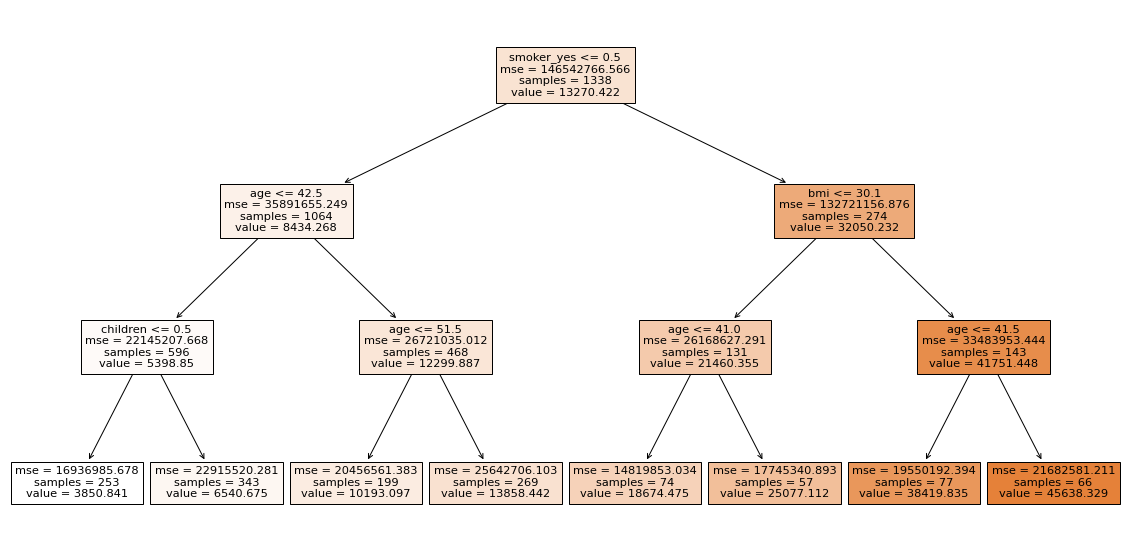

In [ ]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(reg_tree,
                   feature_names=X.columns.to_list(), # make sure the feature names are in output
                   filled=True) # filled true color codes by the class. 

# 8 Evaluate regression tree model

In [ ]:
# predict using our model 
y_pred = reg_tree.predict(X)

display regression metric results

In [ ]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_true, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_true, y_pred))
print("R2:",sklearn.metrics.r2_score(y_true, y_pred))


MAE: 2776.806104694089
MSE: 21045136.93519391
R2: 0.8563891113271006


# 9 Improve lm model performance by interaction and quadratic terms

In [ ]:
insurance['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [ ]:
# add a higher-order "age" term
insurance['age2'] = insurance['age']**2
insurance['age2']

0        361
1        324
2        784
3       1089
4       1024
        ... 
1333    2500
1334     324
1335     324
1336     441
1337    3721
Name: age2, Length: 1338, dtype: int64

In [ ]:
insurance['bmi30'] = 1*(insurance['bmi'] >= 30)

In [ ]:
insurance['bmi30']

0       0
1       1
2       1
3       0
4       0
       ..
1333    1
1334    1
1335    1
1336    0
1337    0
Name: bmi30, Length: 1338, dtype: int64

In [ ]:
(insurance['smoker'] == "yes")*1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
insurance['bmi']*(insurance['smoker'] == "yes")*1

0       27.9
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1333     0.0
1334     0.0
1335     0.0
1336     0.0
1337    29.1
Length: 1338, dtype: float64

In [ ]:
insurance['bmi*smoker'] = insurance['bmi']*(insurance['smoker'] == "yes")*1

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,expenses,age2,bmi30,bmi*smoker
0,19,female,27.9,0,yes,southwest,16884.92,361,0,27.9
1,18,male,33.8,1,no,southeast,1725.55,324,1,0.0
2,28,male,33.0,3,no,southeast,4449.46,784,1,0.0
3,33,male,22.7,0,no,northwest,21984.47,1089,0,0.0
4,32,male,28.9,0,no,northwest,3866.86,1024,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,2500,1,0.0
1334,18,female,31.9,0,no,northeast,2205.98,324,1,0.0
1335,18,female,36.9,0,no,southeast,1629.83,324,1,0.0
1336,21,female,25.8,0,no,southwest,2007.95,441,0,0.0


In [ ]:
ins_enc = pd.get_dummies(insurance)

In [ ]:
train_insurance,test_insurance,y_train,y_test = train_test_split(ins_enc.drop('expenses',axis=1),ins_enc['expenses'],train_size=.7,random_state=42)

In [ ]:
print(train_insurance.shape)
print(test_insurance.shape)
print(y_train.shape)
print(y_test.shape)

(936, 14)
(402, 14)
(936,)
(402,)


# fit the model that includes the interaction term

In [ ]:
reg = LinearRegression().fit(train_insurance,y_train)

In [ ]:
pd.DataFrame({'column':train_insurance.columns,'coef':reg.coef_})
# make sure we used age2 column

,column,coef
0,age,-7.971696
1,bmi,-208.404477
2,children,610.805534
3,age2,3.473221
4,bmi30,3366.723104
5,bmi*smoker,1470.776770
6,sex_female,228.059213
7,sex_male,-228.059213
8,smoker_no,10611.798205
9,smoker_yes,-10611.798205


predict

In [ ]:
y_pred = reg.predict(test_insurance)

show regression metrics

In [ ]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2:",sklearn.metrics.r2_score(y_test, y_pred))


MAE: 2593.627222990946
MSE: 19688472.632637262
R2: 0.8657216339806924


# cross validation using sklearn

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(LinearRegression(), X, y_true, cv=3,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
                        return_train_score=True)

pd.DataFrame(scores)


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.005057,0.002579,0.749262,0.750250,-3.738949e+07,-3.625602e+07,-4267.403752,-4117.179774
1,0.008298,0.002527,0.755220,0.744857,-3.494745e+07,-3.781461e+07,-4096.994849,-4353.682604
2,0.007964,0.002915,0.728309,0.761386,-4.001795e+07,-3.487048e+07,-4341.579839,-4035.354772


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(LinearRegression(), X, y_true, cv=10,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

scores_df = pd.DataFrame(scores)
display(scores_df)
print('mean\n',scores_df.mean())
print('std\n',scores_df.std())


,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.008394,0.002282,0.785982,0.746068,-3.571956e+07,-3.661618e+07
1,0.008233,0.005068,0.732520,0.752828,-3.837814e+07,-3.630521e+07
2,0.008142,0.002335,0.734876,0.752424,-3.706276e+07,-3.645741e+07
3,0.008043,0.002231,0.668888,0.757662,-3.933616e+07,-3.623195e+07
4,0.003290,0.007178,0.771765,0.747814,-3.859806e+07,-3.631751e+07
5,0.007815,0.002267,0.784009,0.747403,-2.660704e+07,-3.763009e+07
6,0.008600,0.002250,0.793136,0.746027,-3.075744e+07,-3.715028e+07
7,0.009213,0.002233,0.668776,0.759764,-4.848017e+07,-3.519326e+07
8,0.012421,0.008155,0.742456,0.751607,-3.332239e+07,-3.687030e+07
9,0.011046,0.002230,0.762774,0.749063,-4.161676e+07,-3.596915e+07


mean
 fit_time                        8.519721e-03
score_time                      3.622890e-03
test_r2                         7.445182e-01
train_r2                        7.510658e-01
test_neg_mean_squared_error    -3.698785e+07
train_neg_mean_squared_error   -3.647413e+07
dtype: float64
std
 fit_time                        2.366415e-03
score_time                      2.315576e-03
test_r2                         4.523533e-02
train_r2                        4.746610e-03
test_neg_mean_squared_error     6.010818e+06
train_neg_mean_squared_error    6.648477e+05
dtype: float64


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(DecisionTreeRegressor(random_state=0), X, y_true, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

scores_df = pd.DataFrame(scores)

print('mean\n',scores_df.mean())
print('std\n',scores_df.std())

mean
 fit_time                        6.218672e-03
score_time                      1.660824e-03
test_r2                         7.097729e-01
train_r2                        9.991347e-01
test_neg_mean_squared_error    -4.245667e+07
train_neg_mean_squared_error   -1.268598e+05
dtype: float64
std
 fit_time                        1.343985e-03
score_time                      9.873322e-05
test_r2                         2.731159e-02
train_r2                        1.030154e-03
test_neg_mean_squared_error     3.595080e+06
train_neg_mean_squared_error    1.503827e+05
dtype: float64


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(DecisionTreeRegressor(random_state=0), X, y_true, cv=10,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

print('mean\n',scores_df.mean())
print('std\n',scores_df.std())

mean
 fit_time                        6.218672e-03
score_time                      1.660824e-03
test_r2                         7.097729e-01
train_r2                        9.991347e-01
test_neg_mean_squared_error    -4.245667e+07
train_neg_mean_squared_error   -1.268598e+05
dtype: float64
std
 fit_time                        1.343985e-03
score_time                      9.873322e-05
test_r2                         2.731159e-02
train_r2                        1.030154e-03
test_neg_mean_squared_error     3.595080e+06
train_neg_mean_squared_error    1.503827e+05
dtype: float64


Did decision tree or linear regression do a better job reducing the error?

In [ ]:
# thank you for reading this notebook!

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/6482_to_4482/Regression-and-regression-trees-insurance-tutorial.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "Regression-and-regression-trees-insurance-tutorial.ipynb"

[NbConvertApp] Converting notebook Regression-and-regression-trees-insurance-tutorial.ipynb to html
[NbConvertApp] Writing 765657 bytes to Regression-and-regression-trees-insurance-tutorial.html
